In [1]:
import pandas as pd
import csv
kickscrape_path ="DSI_kickstarterscrape_dataset.csv"
kickdataframe = pd.read_csv(kickscrape_path, sep=",", encoding="latin-1")

In [2]:
kickdataframe.describe()

,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.080800e+09,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,6.218057e+08,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,5.438962e+08,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,1.078345e+09,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,1.621596e+09,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


In [4]:
kdf = kickdataframe[['duration']]
S = kickdataframe[['status']]
#best length of time
sd = pd.DataFrame(columns=['duration days'])
fd = pd.DataFrame(columns=['duration days'])
i = 0
S_length = len(S)
while i<S_length:
    if S.iloc[i][0] == 'successful':
        #df_length = len(s)
        #s.iloc[df_length] = float(Z.iloc[i][0])
        sd = sd.append({'duration days':float(kdf.iloc[i][0])}, ignore_index=True)
    if S.iloc[i][0] == 'failed':
        #df_length = len(f)
        #f.iloc[df_length] = float(Z.iloc[i][0])
        fd = fd.append({'duration days':float(kdf.iloc[i][0])}, ignore_index=True)
    i=i+1
print(sd.head())
print(fd.head())

   duration days
0          30.00
1          32.22
2          21.43
3          30.00
4          67.53
   duration days
0          47.18
1          30.00
2          30.00
3          40.04
4          60.34


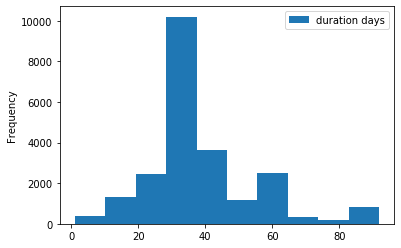

In [6]:
sd.plot(kind="hist")

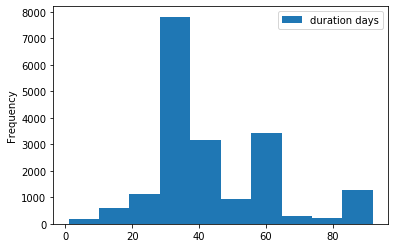

In [5]:
fd.plot(kind="hist" )

In [7]:
sd.describe()

,duration days
count,22969.000000
mean,37.960475
std,16.651234
min,1.000000
25%,30.000000
50%,31.000000
75%,45.000000
max,91.960000


In [8]:
fd.describe()

,duration days
count,18996.000000
mean,42.977828
std,18.691720
min,1.000000
25%,30.000000
50%,36.000000
75%,59.872500
max,91.960000


In [130]:
#FileName: KickScrape_KLarson10292020.ipynb
#Author: Kyle Larson
#Purpose: To analyze the file 
#DSI_kickstarterscrape_dataset.csv

#I had originally attempted to read using read_csv but ran into issues with encoding utf8 and CP1252
#---TO DO: Go back and try using something like the below 
#kickdataframe = pd.read_csv(kickscrape_path, sep=",", encoding="latin-1")
#-----
# NOTE: Parsing this file requires approximately 10 minutes
i=0
with open(kickscrape_path, encoding='latin-1', mode='r') as csv_file:#encoding="utf8"
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        if(i==0):
            cols = row
            df = pd.DataFrame(columns=[cols])
        else:
            df_length = len(df)
            df.loc[df_length] = row
        #if(i==500):
        #    break
        i=i+1
df.head()
          

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500,11545,1.09952381,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000,20,0.005,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000,56,0.0028,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000,6535,1.089166667,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500,0,0,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30


In [90]:
#Note all data above are lists of strings so the usual niceness of dataframes will be less easy
#See TO DO above for tip to improve analyzability

In [23]:
df.describe()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
count,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957,45957
unique,45815,45754,45814,14,51,4850,5,1837,10951,21977,974,41068,64,28379,84,315,5954
top,2141525347,Black Storm,http://www.kickstarter.com/projects/13588168/p...,Film &amp; Video,Documentary,"Los Angeles, CA",successful,5000,0,0,0,"Sun, 01 Jan 2012 04:59:00 -0000",7,"$10,$25,$50,$100,$250,$500,$1,000",0,0,30
freq,2,3,2,13053,4012,3927,22969,4217,3944,3944,3945,44,5847,369,16040,23469,11113


In [25]:
# Note this would be much easier if read_csv was used
import re
X = df[['pledged']]
sigma =0
arbetrary = 20#an arbetrary small number compared to 45957 to account for gap in data
i=0
while(i< len(X)-arbetrary):
    if not re.search('\d+', X.iloc[i][0]):
        print(X.iloc[i][0])
    else:
        sigma = sigma + float(X.iloc[i][0])
    i=i+1
print(sigma)













228735822.0


In [128]:
# population mean
print(sigma/(len(X)-arbetrary))

4979.337396869626


In [132]:
Y = df[['backers']]
y = pd.DataFrame(columns=['backers'])
i=0
Y_length = len(Y) - 20
while i < Y_length:
    if not re.search('\d+', Y.iloc[i][0]):
        print(Y.iloc[i][0])
    else:
        df_length = len(y)
        y.loc[df_length] =  float(Y.iloc[i][0])
    i=i+1
y.head()

,backers
0,66.0
1,2.0
2,3.0
3,100.0
4,0.0


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


(0, 500)

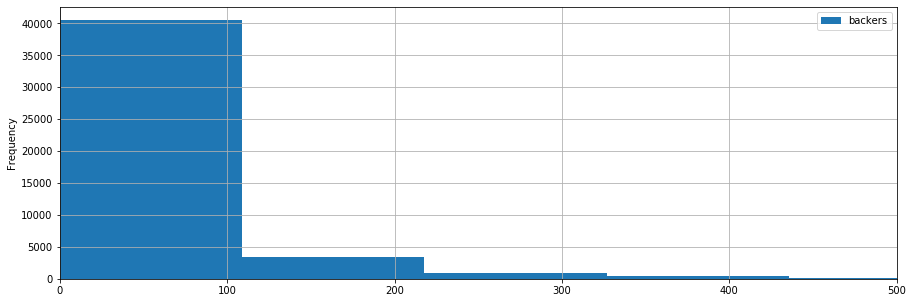

In [134]:
#kind='hist',  bins=50000, xticks=x_t, grid = True, figsize=(15,5)
import matplotlib.pyplot as plt
y.plot(kind='hist',  bins=800, grid = True, figsize=(15,5))
ax = plt.subplot(111)
ax.set_xlim(0, 500)

In [27]:
#the goal here is to see if duration is normally distributed
import re
Z = df[['duration']]
z = pd.DataFrame(columns=['duration'])
i=0
Z_length = len(Z) -20
while i < Z_length:
    if not re.search('\d+', Z.iloc[i][0]):
        print(Z.iloc[i][0])
    else:
        df_length = len(z)
        z.loc[df_length] =  float(Z.iloc[i][0])
    i=i+1
z.head()

,duration
0,30.00
1,47.18
2,28.00
3,32.22
4,30.00


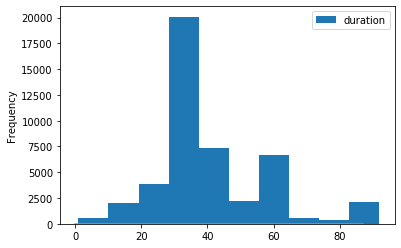

In [14]:
z.plot(kind='hist')
#We alrady know this will not be normal because 30 days and 60 days are recommendations by Kickstarter
#It is interresting to note that there is a significant spike at arround 90 days as well

In [5]:
S = df[['status']]

In [40]:
#best length of time
s = pd.DataFrame(columns=['duration'])
f = pd.DataFrame(columns=['duration'])
i = 0
S_length = len(S)
while i<S_length:
    if S.iloc[i][0] == 'successful':
        #df_length = len(s)
        #s.iloc[df_length] = float(Z.iloc[i][0])
        s = s.append({'duration days':float(Z.iloc[i][0])}, ignore_index=True)
    if S.iloc[i][0] == 'failed':
        #df_length = len(f)
        #f.iloc[df_length] = float(Z.iloc[i][0])
        f = f.append({'duration days':float(Z.iloc[i][0])}, ignore_index=True)
    i=i+1
print(s.head())
print(f.head())

   duration
0     30.00
1     32.22
2     21.43
3     30.00
4     67.53
   duration
0     47.18
1     30.00
2     30.00
3     40.04
4     60.34


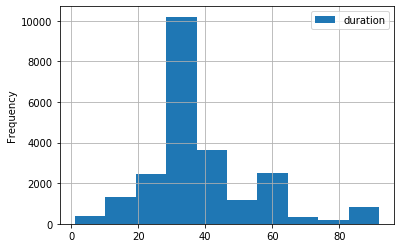

In [46]:
s.plot(kind='hist', grid = True)

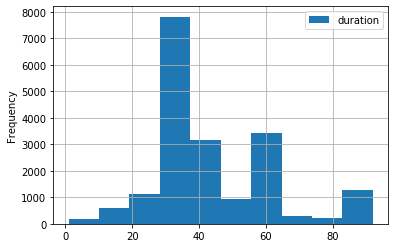

In [47]:
f.plot(kind='hist', grid = True)

In [67]:
#Pooled t-test for comparison of means
#It will be assumed that the distributions have been pulled from normally distributed populations
#This may not be an appropriate assumption due to the nearly identical spikes in samples at 30&60days
#suggesting bimodal distribution, but it is still worth doing because with smaller sample size this 
#the sample could have passed for normally distributed data
#It will be assumed that whether one project is a success is independent from whether the other is a success
#This may not be appropriate because investors sacrifice opportunity with each project they back 
#additionally the number of projects they view and whether their sampling is random also affect 
#whether their selection is independent, but for simplicity sake and to honor the sheer sample size
#we will perform a pooled two sample comparison of means
#to calculate variances S_X_success and S_X_failed
#S_X_s = 0
#NOTE: dtest = pd.DataFrame({'test':[1, 2, 3, 4, 5, 6]}, columns=['test'])
#print(dtest.sum()) #21
#i = 0
#X_s = s.mean()
#s_length = len(s)
#while(i<s_length):
#    S_X_s = S_X_s + (s.iloc[i][0] - X_s)**2
#    i=i+1
#S_X_s = S_X_s/(s_length-1)
#print(S_X_s)  #var is equivalent
#print(s.var())
S_p = ( ( (len(s)-1)*s.var()+ (len(f)-1)*f.var() )/(len(S)+len(f)-2) )**0.5#sqrt
print('calculating statistic factors...')
scaled_root_parallel = (S_p*(((1/len(s))+(1/len(f)))**0.5))
print('calculating statistic factors...')
t_stat = ( s.mean() - f.mean() )/scaled_root_parallel
print('Tstatistic:'+str(t_stat))
print('pooled degrees of freedom:'+str(len(s)+len(f)-2)) #df for pooled 
print('p-value < 0.000001. The test for rejection of Ho (equal means) is significant at alpha = 0.05')
print('mean of successful projects (days): '+str(s.mean()))
#conclusion there is a highly significant correlation between success and projects being shorter than the average success
#note: this correlation does not imply causation, however this is consistent with intuitive strategy
#of providing the right backers with an ideal time frame (near a months time)
#balances the psychology of time pressure to act and the psychology of allowing for exposure and weighing of options
#however further study should control for independence, normality and other factors like campaign complexity
#projects that later turned out to require more time also may have been less likely to succeed in the first place
#to determine the gradient (avg success probability gained by limiting duration per number of days limited)

calculating statistic factors...
calculating statistic factors...
Tstatistic:duration   -36.155673
dtype: float64
pooled degrees of freedom:41963
p-value < 0.000001. The test for rejection of Ho (equal means) is significant at alpha = 0.05
mean of successful projects (days): duration    37.960475
dtype: float64


In [5]:
#ideal pledge goal
P = df[['pledged']]
e = pd.DataFrame(columns=['pledged'])
d = pd.DataFrame(columns=['pledged'])
i = 0
S_length = len(S)
while i<S_length:
    if S.iloc[i][0] == 'successful':
        e = e.append({'pledged':float(P.iloc[i][0])}, ignore_index=True)
    if S.iloc[i][0] == 'failed':
        d = d.append({'pledged':float(P.iloc[i][0])}, ignore_index=True)
    i=i+1
print(e.head())
print(d.head())

   pledged
0  11545.0
1   6535.0
2   3582.0
3   2180.0
4   1125.0
   pledged
0     20.0
1      0.0
2    280.0
3     75.0
4    765.0


In [25]:
x_t=[]
for i in range(12500):
    if(i%500==0):
        x_t.append(i)
print(x_t)

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000]


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


(0, 12500)

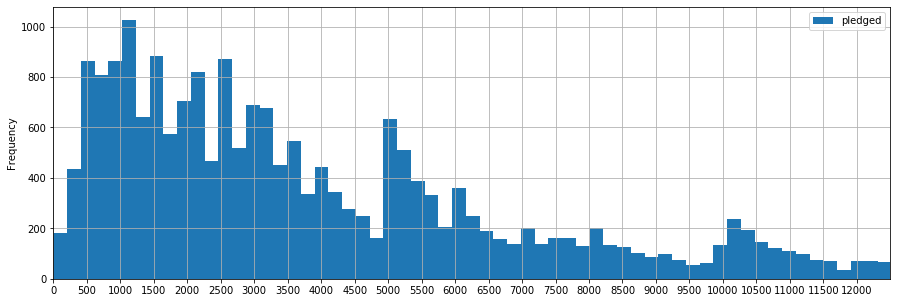

In [28]:
#ideal pledge goal
import matplotlib.pyplot as plt
e.plot(kind='hist',  bins=50000, xticks=x_t, grid = True, figsize=(15,5))
ax = plt.subplot(111)
ax.set_xlim(0, 12500)

In [35]:
x_tt=[]
for i in range(10000):
    if(i%500==0):
        x_tt.append(i)
print(x_tt)

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500]


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 10000)

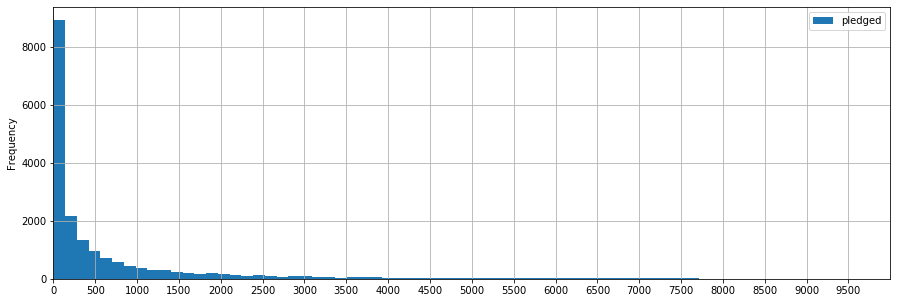

In [36]:
import matplotlib.pyplot as plt
d.plot(kind='hist', bins=800, xticks=x_tt, grid = True, figsize=(15,5))
ax = plt.subplot(111)
ax.set_xlim(0, 10000)

In [6]:
#Type of projects most successful
C = df[['category']]
c = pd.DataFrame(columns=['category'])
b = pd.DataFrame(columns=['category'])
i = 0
S_length = len(S)
while i<S_length:
    if S.iloc[i][0] == 'successful':
        c = c.append({'category':C.iloc[i][0]}, ignore_index=True)
    if S.iloc[i][0] == 'failed':
        b = b.append({'category':C.iloc[i][0]}, ignore_index=True)
    i=i+1
print(c.head())
print(b.head())

       category
0  Film & Video
1  Film & Video
2  Film & Video
3       Fashion
4         Music
       category
0         Games
1       Fashion
2  Film & Video
3         Dance
4    Publishing


In [70]:
#types of projects most successful(continued)
print(c.describe())

       category
count     17728
unique       14
top       Music
freq       5253


In [20]:
#types of projects most successful(continued)
#sort
c=c.sort_values(['category'])
c_category=[]
c_index=[]
#loop through DF if the x value changes, record the index
c_length=len(c)-20
for i in range(c_length):
    if c.iloc[i+1][0] != c.iloc[i][0]:
        c_category.append(c.iloc[i][0])
        c_index.append(i)
c_category.append(c.iloc[c_length][0])
print(c_category)
print(c_index)

['Art', 'Comics', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Film &amp; Video', 'Food', 'Games', 'Music', 'Photography', 'Publishing', 'Technology', 'Theater']
[2105, 2625, 3152, 3881, 4216, 4462, 10639, 11294, 11929, 18721, 19366, 21037, 21326]


In [17]:
#types of projects most successful(continued)
c_frequency = [2105]
for i in range(len(c_index)-1):
    c_frequency.append(c_index[i+1]-c_index[i])
c_frequency.append(len(c)-c_index[len(c_index)-1])

In [18]:
print(c_frequency)

[2105, 520, 527, 729, 335, 246, 6177, 655, 635, 6792, 645, 1671, 289, 1643]


In [3]:
#-----test script for the first 100
#c100 = pd.DataFrame(columns=['category'])
#for i in range(100):
#   c100 = c100.append({'category':c.iloc[i][0]},ignore_index=True)
#for i in range(100):
#   print(c100.iloc[i][0])
#c100=c100.sort_values(['category'])
    
#for i in range(100):# 
#   print(c100.iloc[i][0])
#print(c100.query(expr='Art'))

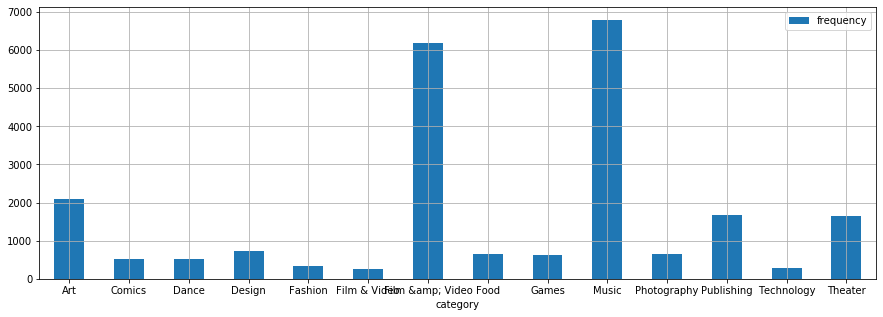

In [22]:
cc = pd.DataFrame({'category':c_category, 'frequency':c_frequency})
cc.plot.bar(x='category', y='frequency', rot=0, grid = True, figsize=(15,5))

In [23]:
#sort
b=b.sort_values(['category'])
b_category=[]
b_index=[]
#loop through DF if the x value changes, record the index
b_length=len(b)-20
for i in range(b_length):
    if b.iloc[i+1][0] != b.iloc[i][0]:
        b_category.append(b.iloc[i][0])
        b_index.append(i)
b_category.append(b.iloc[b_length][0])
print(b_category)
print(b_index)

['Art', 'Comics', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Film &amp; Video', 'Food', 'Games', 'Music', 'Photography', 'Publishing', 'Technology', 'Theater']
[1584, 2032, 2212, 3049, 3733, 3943, 9905, 10548, 11380, 14641, 15383, 17867, 18315]


In [24]:
#types of projects most successful(continued)
b_frequency = [1584]
for i in range(len(b_index)-1):
    b_frequency.append(b_index[i+1]-b_index[i])
b_frequency.append(len(b)-b_index[len(b_index)-1])
print(b_frequency)

[1584, 448, 180, 837, 684, 210, 5962, 643, 832, 3261, 742, 2484, 448, 681]


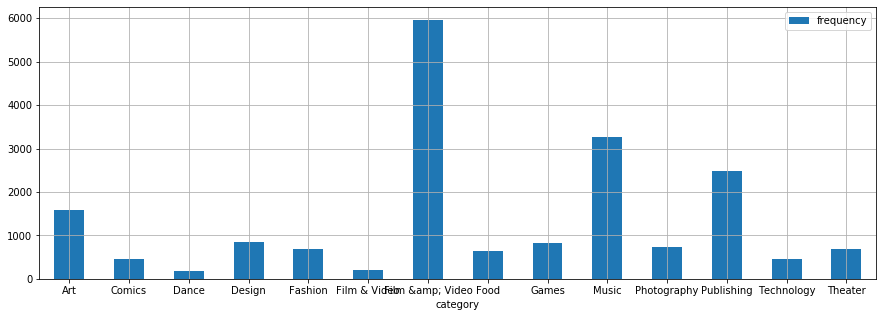

In [25]:
bb = pd.DataFrame({'category':b_category, 'frequency':b_frequency})
bb.plot.bar(x='category', y='frequency', rot=0, grid = True, figsize=(15,5))

In [45]:
#subtract failed from successfull and plot
category_frequency_difference=[]
for i in range(len(c_frequency)):
        category_frequency_difference.append( (c_frequency[i] - b_frequency[i])/(c_frequency[i] + b_frequency[i] ) )
print(category_frequency_difference)

[0.1412306858227162, 0.0743801652892562, 0.4908062234794908, -0.06896551724137931, -0.34249263984298334, 0.07894736842105263, 0.017711508361479528, 0.009244992295839754, -0.13428766189502386, 0.3512384362876753, -0.06993511175198269, -0.1956678700361011, -0.2157394843962008, 0.4139414802065404]


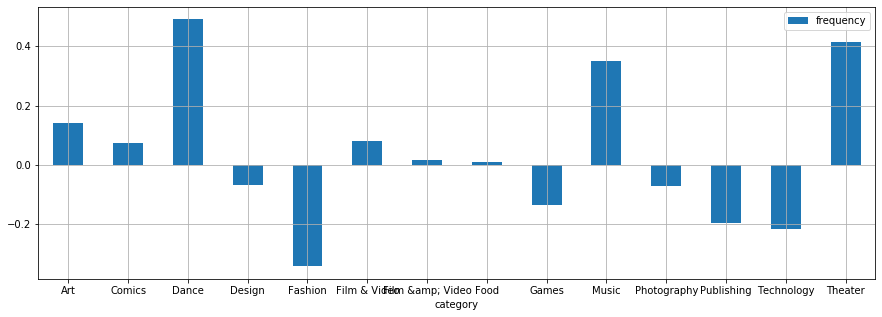

In [46]:
cfd = pd.DataFrame({'category':c_category, 'frequency':category_frequency_difference})
cfd.plot.bar(x='category', y='frequency', rot=0, grid = True, figsize=(15,5))

In [ ]:
#Therefore the Top 5 successful in order are Dance, Theater, Music, Art, Comics, and Film & Video    

In [29]:
#ideal launch timing
fd = df[['funded date']]
fd_success = pd.DataFrame(columns=['funded date'])
fd_failed = pd.DataFrame(columns=['funded date'])
i = 0
S_length = len(S)
while i<S_length:
    if S.iloc[i][0] == 'successful':
        fd_success = fd_success.append({'funded date':fd.iloc[i][0]}, ignore_index=True)
    if S.iloc[i][0] == 'failed':
        fd_failed = fd_failed.append({'funded date':fd.iloc[i][0]}, ignore_index=True)
    i=i+1
print(fd_success.head())
print(fd_failed.head())

                       funded date
0  Fri, 19 Aug 2011 19:28:17 -0000
1  Sun, 08 Apr 2012 02:14:00 -0000
2  Wed, 22 Jun 2011 13:33:00 -0000
3  Fri, 30 Dec 2011 04:36:53 -0000
4  Sun, 18 Apr 2010 04:59:00 -0000
                       funded date
0  Mon, 02 Aug 2010 03:59:00 -0000
1  Wed, 01 Jun 2011 15:25:39 -0000
2  Sat, 18 Feb 2012 02:17:08 -0000
3  Sun, 05 Dec 2010 02:09:39 -0000
4  Fri, 16 Jul 2010 03:59:00 -0000


In [81]:
#lets sort by year
#Get the Month and Year from the string
import re
#months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#years = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,]
success_mmyy =[]
i=0
fd_length = len(fd_success) -20
while i < fd_length:#test with 5
    date_sub = fd_success.iloc[i][0]
    date_sub= date_sub.replace(date_sub[16:31],'')
    date_sub= date_sub.replace(date_sub[0:7],'')
    success_mmyy.append(date_sub)
    i=i+1
#print(success_mmyy)
#Get the Month and Year from the string
import re
#months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#years = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,]
success_yymm =[]
i=0
fdr_length = len(fd_success) -20
while i < fdr_length:#test with 5
    date_sub = fd_success.iloc[i][0]
    #print(date_sub)
   #date_sub = date_sub.replace(date_sub[16:31],'')
   #date_sub = date_sub.replace(date_sub[0:7],'')
    date_sub = date_sub.replace(date_sub[0:1], date_sub[5:9])
    date_sub = date_sub.replace(date_sub[7:15], '')
    success_yymm.append(date_sub)
    i=i+1
print(success_yymm)

['2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr'

In [106]:
#sort
fd_success = pd.DataFrame({'funded date':success_yymm})
fd_success=fd_success.sort_values(['funded date'])
fd_category=[]
fd_index=[]
#loop through DF if the x value changes, record the index
fd_s_length=len(fd_success)-20
for i in range(fd_s_length):
    if fd_success.iloc[i+1][0] != fd_success.iloc[i][0]:
        fd_category.append(fd_success.iloc[i][0])
        fd_index.append(i)
fd_category.append(fd_success.iloc[fd_s_length][0])
print(fd_category)
print(fd_index)

['2009Aug', '2009Dec', '2009Jul', '2009Jun', '2009May', '2009Nov', '2009Oct', '2009Sep', '2010Apr', '2010Aug', '2010Dec', '2010Feb', '2010Jan', '2010Jul', '2010Jun', '2010Mar', '2010May', '2010Nov', '2010Oct', '2010Sep', '2011Apr', '2011Aug', '2011Dec', '2011Feb', '2011Jan', '2011Jul', '2011Jun', '2011Mar', '2011May', '2011Nov', '2011Oct', '2011Sep', '2012Apr', '2012Feb', '2012Jan', '2012Jun', '2012Mar', '2012May']
[29, 125, 161, 177, 180, 267, 331, 369, 571, 1022, 1557, 1660, 1759, 2182, 2504, 2654, 2906, 3377, 3830, 4273, 5283, 6465, 7558, 8148, 8689, 9739, 10748, 11583, 12661, 13618, 14631, 15626, 17343, 18414, 19431, 19617, 21217]


In [107]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#sort by month
for m in range(len(fd_category)):
    for n in range(len(months)):
        sub_date = fd_category[m]
        if re.search(str('.'+months[n]), sub_date):
            if n>8:
                sub_date = sub_date.replace(sub_date[4:7], ' '+str(n+1))
            if n<=8:
                sub_date = sub_date.replace(sub_date[4:7], ' 0'+str(n+1))
            fd_category[m]=sub_date

In [108]:
#launch timing most successful(continued)
fd_frequency = [29]
for i in range(len(fd_index)-1):
    fd_frequency.append(fd_index[i+1]-fd_index[i])
fd_frequency.append(len(fd_success)-fd_index[len(fd_index)-1])
print(fd_frequency)

[29, 96, 36, 16, 3, 87, 64, 38, 202, 451, 535, 103, 99, 423, 322, 150, 252, 471, 453, 443, 1010, 1182, 1093, 590, 541, 1050, 1009, 835, 1078, 957, 1013, 995, 1717, 1071, 1017, 186, 1600, 1712]


In [109]:
dcfd = pd.DataFrame({'funded date':fd_category, 'frequency':fd_frequency})
dcfd = dcfd.sort_values(['funded date'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text xticklabel objects>)

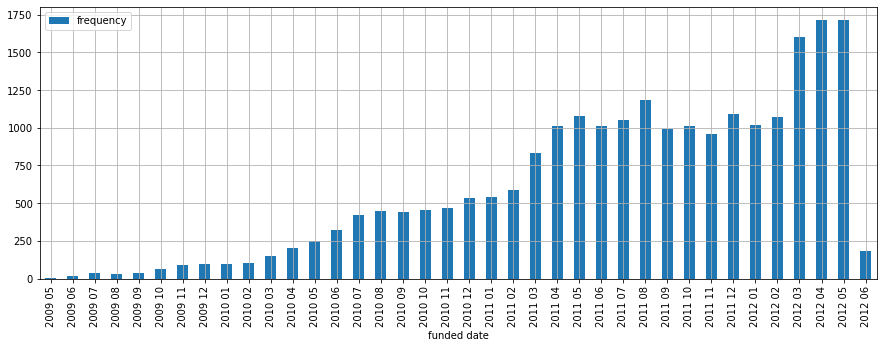

In [110]:
import matplotlib.pyplot as plt
dcfd.plot.bar(x='funded date', y='frequency', rot=0, grid = True, figsize=(15,5))
#fix the labels
plt.xticks(rotation=90)

In [114]:
#Get the Month and Year from the string
import re
#months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#years = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,]
failed_mmyy =[]
i=0
fd_length = len(fd_failed) -20
while i < fd_length:#test with 5
    date_sub = fd_failed.iloc[i][0]
    date_sub= date_sub.replace(date_sub[16:31],'')
    date_sub= date_sub.replace(date_sub[0:7],'')
    failed_mmyy.append(date_sub)
    i=i+1
import re
#months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#years = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,]
failed_yymm =[]
i=0
fdrf_length = len(fd_failed) -20
while i < fdrf_length:#test with 5
    date_sub = fd_failed.iloc[i][0]
    #print(date_sub)
   #date_sub = date_sub.replace(date_sub[16:31],'')
   #date_sub = date_sub.replace(date_sub[0:7],'')
    date_sub = date_sub.replace(date_sub[0:1], date_sub[5:9])
    date_sub = date_sub.replace(date_sub[7:15], '')
    failed_yymm.append(date_sub)
    i=i+1
print(failed_yymm)

['2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr', '2010Apr'

' Apr 2010'

In [116]:
#sort
fd_failed = pd.DataFrame({'funded date':failed_yymm})
fd_failed=fd_failed.sort_values(['funded date'])
fdf_category=[]
fdf_index=[]
#loop through DF if the x value changes, record the index
fd_f_length=len(fd_failed)-20
for i in range(fd_f_length):
    if fd_failed.iloc[i+1][0] != fd_failed.iloc[i][0]:
        fdf_category.append(fd_failed.iloc[i][0])
        fdf_index.append(i)
fdf_category.append(fd_failed.iloc[fd_f_length][0])
print(fdf_category)
print(fdf_index)

['2009Aug', '2009Dec', '2009Jul', '2009Jun', '2009May', '2009Nov', '2009Oct', '2009Sep', '2010Apr', '2010Aug', '2010Dec', '2010Feb', '2010Jan', '2010Jul', '2010Jun', '2010Mar', '2010May', '2010Nov', '2010Oct', '2010Sep', '2011Apr', '2011Aug', '2011Dec', '2011Feb', '2011Jan', '2011Jul', '2011Jun', '2011Mar', '2011May', '2011Nov', '2011Oct', '2011Sep', '2012Apr', '2012Feb', '2012Jan', '2012Jun', '2012Mar', '2012May']
[18, 145, 160, 168, 175, 251, 301, 328, 439, 880, 1321, 1391, 1461, 1922, 2204, 2298, 2495, 2868, 3265, 3673, 4315, 5231, 6233, 6662, 7084, 7944, 8761, 9327, 10142, 10815, 11637, 12438, 13879, 14847, 15801, 16006, 17311]


In [117]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#sort by month
for m in range(len(fdf_category)):
    for n in range(len(months)):
        sub_date = fdf_category[m]
        if re.search(str('.'+months[n]), sub_date):
            if n>8:
                sub_date = sub_date.replace(sub_date[4:7], ' '+str(n+1))
            if n<=8:
                sub_date = sub_date.replace(sub_date[4:7], ' 0'+str(n+1))
            fdf_category[m]=sub_date

In [53]:
#launch timing most successful(continued)
fdf_frequency = [110]
for i in range(len(fdf_index)-1):
    fdf_frequency.append(fdf_index[i+1]-fdf_index[i])
fdf_frequency.append(len(fd_failed)-fdf_index[len(fdf_index)-1])
print(fdf_frequency)

[110, 642, 1441, 19, 441, 916, 127, 441, 1002, 70, 429, 968, 70, 422, 954, 15, 461, 860, 8, 282, 817, 205, 94, 566, 1305, 7, 197, 815, 1644, 76, 373, 673, 50, 397, 822, 27, 408, 822]


In [120]:
fdcfd = pd.DataFrame({'funded date':fdf_category, 'frequency':fdf_frequency})
fdcfd = fdcfd.sort_values(['funded date'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text xticklabel objects>)

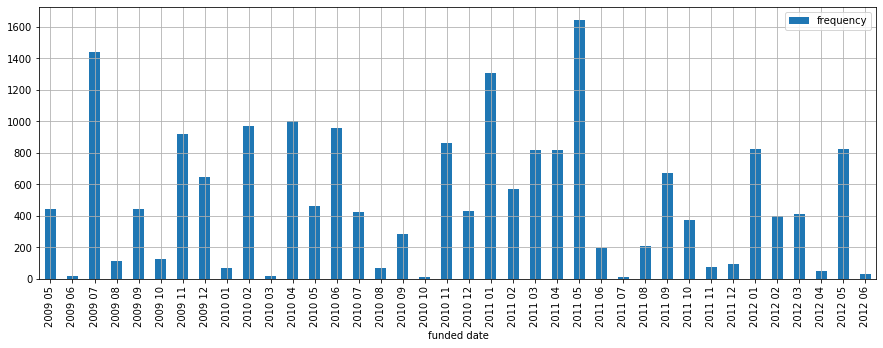

In [121]:
import matplotlib.pyplot as plt
fdcfd.plot.bar(x='funded date', y='frequency', rot=0, grid = True, figsize=(15,5))
#fix the labels
plt.xticks(rotation=90)

In [122]:
#relative frequency
category_frequency_difference=[]
for i in range(len(fd_frequency)):
        category_frequency_difference.append( (fd_frequency[i] - fdf_frequency[i])/(fd_frequency[i] + fdf_frequency[i] ) )
print(category_frequency_difference)

[-0.5827338129496403, -0.7398373983739838, -0.9512525389302641, -0.08571428571428572, -0.9864864864864865, -0.8265204386839482, -0.3298429319371728, -0.8413361169102297, -0.6644518272425249, 0.7312859884836852, 0.10995850622406639, -0.80765639589169, 0.17159763313609466, 0.001183431952662722, -0.4952978056426332, 0.8181818181818182, -0.29312762973352036, -0.29226145755071375, 0.96529284164859, 0.22206896551724137, 0.1056376573617953, 0.7043979812545061, 0.8416175231676495, 0.020761245674740483, -0.41386782231852653, 0.9867549668874173, 0.6733001658374793, 0.012121212121212121, -0.20793534166054373, 0.8528557599225557, 0.46176046176046176, 0.19304556354916066, 0.9434069043576684, 0.4591280653950954, 0.10603588907014681, 0.7464788732394366, 0.5936254980079682, 0.35122336227308604]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text xticklabel objects>)

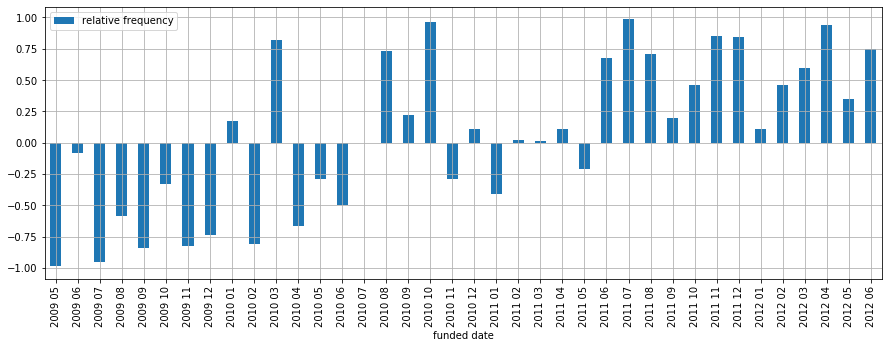

In [128]:
import matplotlib.pyplot as plt
rfcfd = pd.DataFrame({'funded date':fd_category, 'relative frequency':category_frequency_difference})
rfcfd = rfcfd.sort_values(['funded date'])
rfcfd.plot.bar(x='funded date', y='relative frequency', rot=0, grid = True, figsize=(15,5))
#fix the labels
plt.xticks(rotation=90)